In [ ]:
import pandas as pd
df = pd.read_csv("formated_data3.csv",encoding="ISO-8859-1")
df['event_date']=pd.to_datetime(df["event_date"],infer_datetime_format=True)

In [ ]:
#dropping empty and rows with unknown
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
df = df[df.landslide_trigger != 'unknown']
df = df[df.landslide_setting != 'unknown']
df.drop_duplicates()

,event_date,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,country_code,admin_division_name,admin_division_population,longitude,latitude,temp,humidity,wind
0,2015-05-17 00:00:00,landslide,rain,medium,urban,0,0,MX,Baja California,1173,-117.0898,32.5196,16.4,74.0,13.6
1,2016-10-01 00:00:00,landslide,downpour,medium,bluff,0,0,GB,England,2565,0.8546,51.4216,12.3,88.0,11.3
2,2015-04-02 00:00:00,landslide,continuous_rain,medium,natural_slope,0,0,IN,Kashmir,14965,74.4725,34.1587,5.2,92.0,4.3
3,2015-07-19 00:00:00,landslide,downpour,small,above_road,0,0,US,California,20292,-116.9029,33.0742,21.3,93.0,11.8
4,2015-10-21 00:00:00,landslide,rain,medium,above_road,0,0,MX,Chiapas,19092,-92.2523,15.3482,18.2,92.0,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,2015-03-05 09:00:00,mudslide,rain,small,above_road,0,0,US,West Virginia,1344,-81.2565,37.7028,-0.9,95.0,14.3
1703,2014-12-02 00:00:00,debris_flow,rain,medium,burned_area,0,0,US,California,3249,-118.9858,34.1946,17.8,73.0,3.3
1704,2016-10-24 23:00:00,rock_fall,construction,medium,mine,0,2,CA,British Columbia,4038,-116.4362,51.4197,3.9,81.0,4.3
1705,2015-11-16 09:00:00,landslide,downpour,medium,natural_slope,0,0,MY,Kuala Lumpur,1453975,101.7036,3.1497,27.4,82.0,3.7


In [ ]:
#splitting date time into columns
df['event_date_year'] = df['event_date'].dt.year
df['event_date_month'] = df['event_date'].dt.month
df['event_date_week'] = df['event_date'].dt.week
df['event_date_day'] = df['event_date'].dt.day
df['event_date_hour'] = df['event_date'].dt.hour
df['event_date_minute'] = df['event_date'].dt.minute
df['event_date_dayofweek'] = df['event_date'].dt.dayofweek
df = df.drop('event_date', axis=1)

<ipython-input-4-534d57747069>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['event_date_week'] = df['event_date'].dt.week


In [ ]:
Y_labels=df['landslide_trigger'].unique()
print(Y_labels)

['rain' 'downpour' 'continuous_rain' 'flooding' 'no_apparent_trigger'
 'dam_embankment_collapse' 'earthquake' 'mining' 'tropical_cyclone'
 'monsoon' 'construction' 'volcano' 'snowfall_snowmelt' 'other'
 'freeze_thaw']


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['country_code']=le.fit_transform(df['country_code'])
df['landslide_category']=le.fit_transform(df['landslide_category'])
df['landslide_trigger']=le.fit_transform(df['landslide_trigger'])
df['landslide_setting']=le.fit_transform(df['landslide_setting'])
df['landslide_size']=le.fit_transform(df['landslide_size'])
df['admin_division_name']=le.fit_transform(df['admin_division_name'])

In [ ]:
X=df
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),index=X.index, columns=X.columns)
Y = df['landslide_trigger']
X=X.drop('landslide_trigger',axis=1)

In [ ]:
#X_backup=X
#X=X_backup
#X=X[['temp','longitude','landslide_category','wind','landslide_setting','admin_division_population','country_code','fatality_count','latitude','landslide_size']]
X=X[['temp','longitude','landslide_category','wind','landslide_setting','admin_division_population','country_code','latitude','fatality_count']]
#X=X[['temp','longitude','wind','admin_division_population','latitude']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

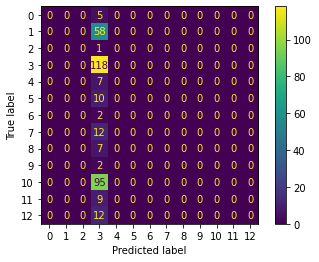

<Figure size 360x288 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import statistics
import random
import matplotlib.pyplot as plt
from sklearn .dummy import DummyClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn . metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns

MostFrequentModel=DummyClassifier(strategy="most_frequent")
MostFrequentModel.fit(X_train,Y_train)
yMostFrequentModelpred=MostFrequentModel.predict(X_test)
confusion_matrix=metrics.confusion_matrix(Y_test,yMostFrequentModelpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.figure(figsize=(5,4))
plt.show()

poly=PolynomialFeatures(3)
X_poly=poly.fit_transform(X)

LogRegModel=LogisticRegression(C=1,penalty='l2')
LogRegModel.fit(X_poly,Y)
ylogpred=LogRegModel.predict(X_poly)
confusion_matrix = metrics.confusion_matrix(Y_test,ylogpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

KNNModel=KNeighborsClassifier(n_neighbors=5)
KNNModel.fit(X_train,Y_train)
yKNNpred=KNNModel.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test,yKNNpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()


RFCModel=RandomForestClassifier(n_estimators=1200,max_depth=20,min_samples_split=5)
RFCModel.fit(X_train,Y_train)
yRFCpred=RFCModel.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test,yRFCpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()


SVCModel=SVC(C=6, gamma=1)
SVCModel.fit(X_train,Y_train)
ySVCpred=RFCModel.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test,ySVCpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


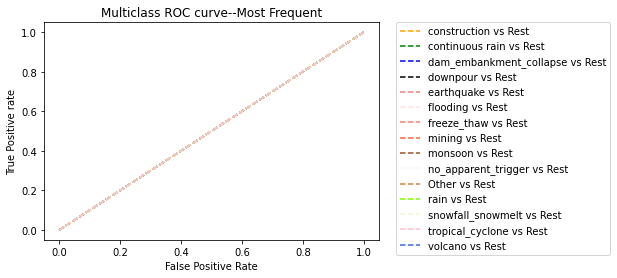

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import statistics
import random
import matplotlib.pyplot as plt
from sklearn .dummy import DummyClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn . metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import roc_curve, auc


MostFrequentModel=DummyClassifier(strategy="most_frequent")
MostFrequentModel.fit(X_test,Y_test)
yMostFrequentModelpred=MostFrequentModel.predict(X_test)
y_score = MostFrequentModel.fit(X_train, Y_train).predict_proba(X_test)

n_classes = 15
fpr = {}
tpr = {}
thresh ={}

for i in range(n_classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, y_score[:,i], pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='construction vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='continuous rain vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='dam_embankment_collapse vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='downpour vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='lightcoral', label='earthquake vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='mistyrose', label='flooding vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='salmon', label='freeze_thaw vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='tomato', label='mining vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='sienna', label='monsoon vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='seashell', label='no_apparent_trigger vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='peru', label='Other vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='chartreuse', label='rain vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='beige', label='snowfall_snowmelt vs Rest')
plt.plot(fpr[13], tpr[13], linestyle='--',color='pink', label='tropical_cyclone vs Rest')
plt.plot(fpr[14], tpr[14], linestyle='--',color='royalblue', label='volcano vs Rest')
plt.title('Multiclass ROC curve--Most Frequent')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.savefig('Multiclass ROC',dpi=300); 



----------------------------------------------------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

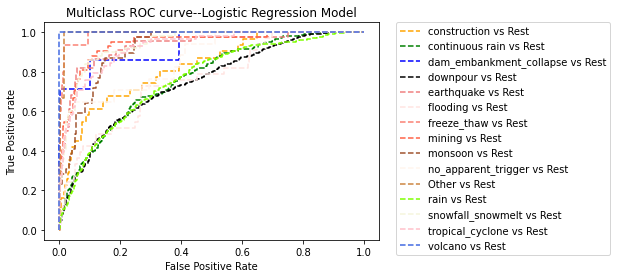

In [ ]:
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
poly=PolynomialFeatures(3)
X_poly=poly.fit_transform(X)

LogRegModel=LogisticRegression(C=1,penalty='l2')
LogRegModel.fit(X_poly,Y)
ylogpred=LogRegModel.predict(X_poly)
y_score = LogRegModel.fit(X_poly, Y).predict_proba(X_poly)

n_classes = 15
fpr = {}
tpr = {}
thresh ={}

for i in range(n_classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y, y_score[:,i], pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='construction vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='continuous rain vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='dam_embankment_collapse vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='downpour vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='lightcoral', label='earthquake vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='mistyrose', label='flooding vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='salmon', label='freeze_thaw vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='tomato', label='mining vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='sienna', label='monsoon vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='seashell', label='no_apparent_trigger vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='peru', label='Other vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='chartreuse', label='rain vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='beige', label='snowfall_snowmelt vs Rest')
plt.plot(fpr[13], tpr[13], linestyle='--',color='pink', label='tropical_cyclone vs Rest')
plt.plot(fpr[14], tpr[14], linestyle='--',color='royalblue', label='volcano vs Rest')
plt.title('Multiclass ROC curve--Logistic Regression Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.savefig('Multiclass ROC',dpi=300); 


----------------------------------------------------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


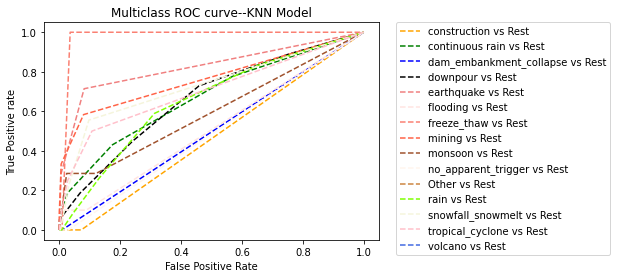

In [ ]:
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
KNNModel=KNeighborsClassifier(n_neighbors=5)
KNNModel.fit(X,Y)
yKNNpred=KNNModel.predict(X_test)
y_score = KNNModel.fit(X_train, Y_train).predict_proba(X_test)

n_classes = 15
fpr = {}
tpr = {}
thresh ={}

for i in range(n_classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, y_score[:,i], pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='construction vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='continuous rain vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='dam_embankment_collapse vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='downpour vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='lightcoral', label='earthquake vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='mistyrose', label='flooding vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='salmon', label='freeze_thaw vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='tomato', label='mining vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='sienna', label='monsoon vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='seashell', label='no_apparent_trigger vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='peru', label='Other vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='chartreuse', label='rain vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='beige', label='snowfall_snowmelt vs Rest')
plt.plot(fpr[13], tpr[13], linestyle='--',color='pink', label='tropical_cyclone vs Rest')
plt.plot(fpr[14], tpr[14], linestyle='--',color='royalblue', label='volcano vs Rest')
plt.title('Multiclass ROC curve--KNN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.savefig('Multiclass ROC',dpi=300); 



----------------------------------------------------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


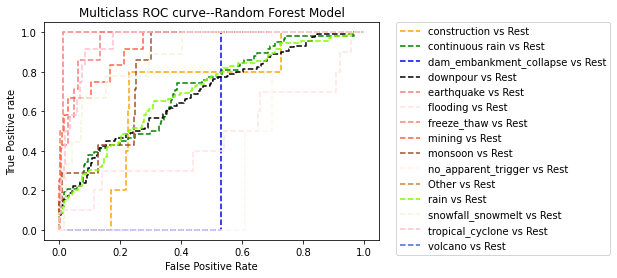

In [ ]:
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
RFCModel=RandomForestClassifier(n_estimators=1200,max_depth=20,min_samples_split=5)
RFCModel.fit(X_train,Y_train)
yRFCpred=RFCModel.predict(X_test)
y_score = RFCModel.fit(X_train,Y_train).predict_proba(X_test)

n_classes = 15
fpr = {}
tpr = {}
thresh ={}

for i in range(n_classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, y_score[:,i], pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='construction vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='continuous rain vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='dam_embankment_collapse vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='downpour vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='lightcoral', label='earthquake vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='mistyrose', label='flooding vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='salmon', label='freeze_thaw vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='tomato', label='mining vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='sienna', label='monsoon vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='seashell', label='no_apparent_trigger vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='peru', label='Other vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='chartreuse', label='rain vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='beige', label='snowfall_snowmelt vs Rest')
plt.plot(fpr[13], tpr[13], linestyle='--',color='pink', label='tropical_cyclone vs Rest')
plt.plot(fpr[14], tpr[14], linestyle='--',color='royalblue', label='volcano vs Rest')
plt.title('Multiclass ROC curve--Random Forest Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.savefig('Multiclass ROC',dpi=300); 



----------------------------------------------------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


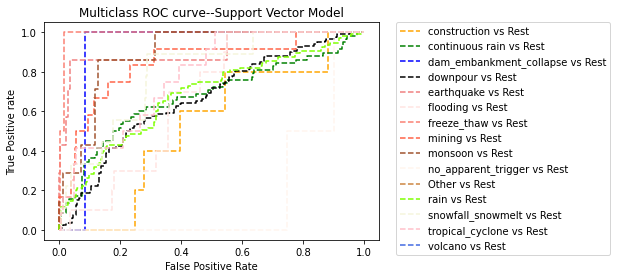

In [ ]:
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
SVCModel=SVC(C=6, gamma=1)
SVCModel.fit(X_train,Y_train)
y_score = SVCModel.fit(X_train, Y_train).decision_function(X_test)

n_classes = 15
fpr = {}
tpr = {}
thresh ={}

for i in range(n_classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, y_score[:,i], pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='construction vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='continuous rain vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='dam_embankment_collapse vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='downpour vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='lightcoral', label='earthquake vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='mistyrose', label='flooding vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='salmon', label='freeze_thaw vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='tomato', label='mining vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='sienna', label='monsoon vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='seashell', label='no_apparent_trigger vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='peru', label='Other vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='chartreuse', label='rain vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='beige', label='snowfall_snowmelt vs Rest')
plt.plot(fpr[13], tpr[13], linestyle='--',color='pink', label='tropical_cyclone vs Rest')
plt.plot(fpr[14], tpr[14], linestyle='--',color='royalblue', label='volcano vs Rest')
plt.title('Multiclass ROC curve--Support Vector Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.savefig('Multiclass ROC',dpi=300); 